In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [108]:
df = pd.read_csv('data_penjualan.csv', usecols=['ReceiptNumber', 'Date', 'Items', 'Quantity', 'NetSales', 'Category'])

In [109]:
df.head(1000)

,ReceiptNumber,Date,Category,Items,Quantity,NetSales
0,TSBZIO,1/1/2023,Tea,Lemon Tea,1.0,14400.0
1,TSBZIP,1/1/2023,Tea,Lychee Tea,1.0,20800.0
2,TSBZIP,1/1/2023,Signature Coffee,Kopi Rakyat,1.0,16000.0
3,TSBZIR,1/1/2023,Signature Coffee,Kopi Rakyat,3.0,78000.0
4,TSBZIR,1/1/2023,Signature Coffee,Kopi Rakyat,1.0,26000.0
...,...,...,...,...,...,...
995,TSC0J2,1/14/2023,Milk Based,Matcha Latte,1.0,30000.0
996,TSC0J2,1/14/2023,Signature Coffee,Kopi Sultan,1.0,29000.0
997,TSC0J3,1/14/2023,Main Course,Bolognaise,1.0,40000.0
998,TSC0J3,1/14/2023,Side Dish,Sosis Bakar,1.0,28000.0


In [110]:
df.dtypes

ReceiptNumber     object
Date              object
Category          object
Items             object
Quantity         float64
NetSales         float64
dtype: object

In [282]:
#recency
#perhitungan recency menghitung seberapa baru pelanggan melakukan pembelian pada item tertentu
#day = tanggal dihitung dari 2024
#rumus dasar yang di guanakan ialah Tanggal Refrensi = (day) - Tanggal pembelian terbaru di ambil dari dataFrame(df)[date]
day='2024-01-01'
day=pd.to_datetime(day)
df['Date']=pd.to_datetime(df['Date'])

recency = df.groupby(['Items']).agg({'Date': lambda x: ((day-x.max()).days)})

In [270]:
recency.head(100)

,Date
Items,
,484
Aglio Oglio,489
Aglio Oglio,372
Aglio Oglio,390
Almond Croissant,372
...,...
Kopi Kow,372
Kopi Kow,374
Kopi Rakyat,493


In [230]:
#frecuency
freq1= df.groupby(['Category', 'Items']).size() 

In [231]:
freq1.head(100)

Category  Items            
Bakery    Almond Croissant      65
          Butter Croissant      73
          Koighn - Amann        49
Blend     Cookies & Cream       14
Blend     Cookies & Cream      138
                              ... 
Gofood    Kopi Rakyat           36
          Kopi Sultan           12
          Lychee Tea             1
          Lychee Yakult          1
          Mango Milk             1
Length: 100, dtype: int64

In [232]:
freq2 = df.groupby(['Category', 'Items']).size().sort_values(ascending=False)

In [233]:
freq2.head(100)

Category           Items          
Signature Coffee   Kopi Rakyat        2740
Shopee             Kopi Rakyat         778
Signature Coffee   Kopi Rakyat         561
Tea                Lychee Tea          531
Signature Coffee   Kopi Sultan         420
                                      ... 
Gofood             Kopi Rakyat          36
Gofood             Choco Origin         35
Main Course        Bolognaise           33
Gofood             Black Coffee         33
Signature Coffee   Kopi Dewan           32
Length: 100, dtype: int64

In [341]:
#Frequency
#Mengambil transaksi date dan items untuk menghitung berapa item yang sudah di beli dalam periode yang ada di dalam data fram
df['Date']=pd.to_datetime(df['Date'])
freq=df.groupby(["Items"])[["Date"]].count()

In [342]:
freq.head(20)

,Date
Items,
,21
Aglio Oglio,1
Aglio Oglio,109
Aglio Oglio,7
Almond Croissant,65
Black Coffee,53
Black Coffee,29
Black Coffee,144
Black Coffee,57


In [343]:
freq3=df.groupby(["Items"])[["Category"]].value_counts(ascending=True)

In [329]:
freq3.head(1000)

Items             Category       
                  GoFood              6
                  Shopee             15
Aglio Oglio       Uncategorized       1
Aglio Oglio       Uncategorized       1
                  Main Course         5
                                     ..
Vanilla Latte     Espresso Based      4
Vanilla Latte     Shopee              1
                  Espresso Based     38
Vanilla Latte     Gofood              3
                  Shopee              9
Name: count, Length: 301, dtype: int64

In [330]:
#Monetary
df["total"] = df["NetSales"]*df["Quantity"]

In [331]:
#Monetary
#mengukur total uang yang sudah di keluarkan pelanggan untuk membeli item items yang paling banyaj menghasilkan uang akan memiliki skor monetary yang lebih tinggi
money = df.groupby(['Items'])[['total']].sum()
money

,total
Items,
,1086400.0
Aglio Oglio,40000.0
Aglio Oglio,6044000.0
Aglio Oglio,336000.0
Almond Croissant,2119000.0
...,...
Thai Tea,1338000.0
Vanilla Latte,857200.0
Vanilla Latte,126000.0


In [332]:
df.dtypes

ReceiptNumber            object
Date             datetime64[ns]
Category                 object
Items                    object
Quantity                float64
NetSales                float64
total                   float64
dtype: object

In [346]:
RFM=pd.concat([recency,freq,money],axis=1)
recency.columns=["Recency"]
freq.columns=["Frecuency"]
money.columns=["Monetary"]



In [347]:
RFM.head(10)

,Recency,Frecuency,Monetary
Items,,,
,327,21,1086400.0
Aglio Oglio,332,1,40000.0
Aglio Oglio,215,109,6044000.0
Aglio Oglio,233,7,336000.0
Almond Croissant,215,65,2119000.0
Black Coffee,336,53,1423000.0
Black Coffee,332,29,728000.0
Black Coffee,215,144,3976800.0
Black Coffee,217,57,3660000.0


In [243]:
#Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

sim = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_data = sim.fit_transform(RFM)

scaler=StandardScaler()
scaled=scaler.fit_transform(imputed_data)




c:\Users\1567\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\1567\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\1567\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\1567\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

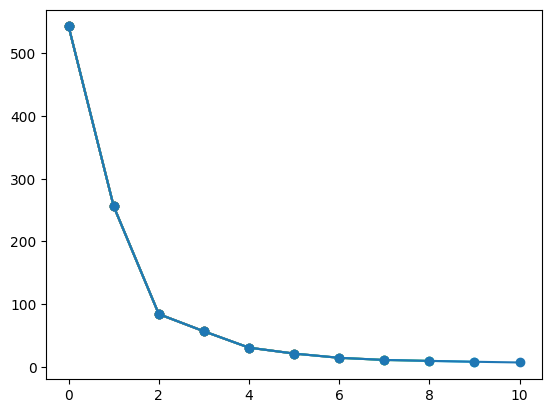

In [244]:
#Clustering
from sklearn.cluster import KMeans

inertia=[]
for i in np.arange(1,12):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)
    plt.plot(inertia, marker='o')
    

In [262]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled)
RFM["Cluster"]=(kmeans.labels_ +1)

c:\Users\1567\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [260]:
RFM

,Recency,Frecuency,Monetary
Items,,,
,327,21,1086400.0
Aglio Oglio,332,1,40000.0
Aglio Oglio,215,109,6044000.0
Aglio Oglio,233,7,336000.0
Almond Croissant,215,65,2119000.0
...,...,...,...
Thai Tea,216,29,1338000.0
Vanilla Latte,341,26,857200.0
Vanilla Latte,336,4,126000.0


In [263]:
group=RFM.groupby(['Cluster'])[['Recency','Frecuency', 'Monetary']].apply(lambda x: x)
group


Recency  Frecuency      Monetary
Cluster Items                                             
1                             327         21  1.086400e+06
        Aglio Oglio           332          1  4.000000e+04
        Black Coffee          336         53  1.423000e+06
        Black Coffee          332         29  7.280000e+05
        Blue Lime             341         14  2.744000e+06
...                           ...        ...           ...
2       Thai Tea              216         29  1.338000e+06
        Vanilla Latte         215         39  1.210000e+06
        Vanilla Latte         217         12  6.000000e+05
3       Kopi Rakyat           215       2829  1.641509e+08
        Kopi Rakyat           215       1147  1.255358e+08

[181 rows x 3 columns]